In [29]:
# variables
path = 'cropped.png'
size = 500
darkness = 8
num_nails = 300
max_lines = 6000

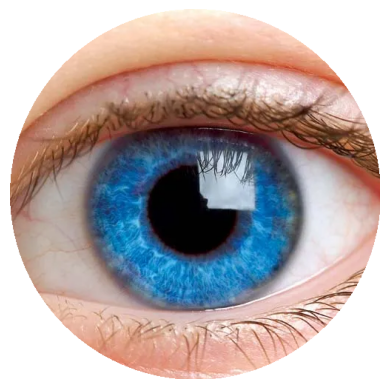

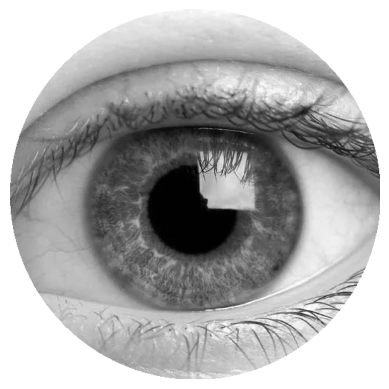

In [30]:
# circle and grayscale image

# circle
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def apply_mask(image_path, output_path):
    # Load image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_np = np.array(img)
    
    # Create a new image ('L' mode means each pixel is a single grayscale value)
    mask = Image.new('L', (img_np.shape[1], img_np.shape[0]), 0)
    
    # Get the center and radius of the circle
    y_center, x_center = img_np.shape[0] // 2, img_np.shape[1] // 2
    radius = min(x_center, y_center)
    
    # Draw a white filled circle in the black image
    ImageDraw.Draw(mask).ellipse((x_center-radius, y_center-radius, x_center+radius, y_center+radius), fill=255)

    # Convert mask to numpy array
    mask_np = np.array(mask)
    
    # Convert mask to 3 channels
    mask_rgb = np.stack([mask_np]*3, axis=-1)
    
    # Apply the mask
    masked_img = np.where(mask_rgb==255, img_np, 255) # You can change 255 to 0 if you want to make the background black
    
    # Convert to Image and save
    masked_img_pil = Image.fromarray(np.uint8(masked_img))
    masked_img_pil.save(output_path)
    
    # Display the image in Jupyter notebook
    plt.imshow(masked_img_pil)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

apply_mask(path, 'cropped_and_masked.png')

# grayscale
def convert_to_grayscale(image_path, output_path):
    # Load image
    img = Image.open(image_path)
    
    # Convert image to grayscale
    grayscale_img = img.convert('L')
    
    # Save the grayscale image
    grayscale_img.save(output_path)
    
    # Display the image in Jupyter notebook
    plt.imshow(grayscale_img, cmap='gray')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

convert_to_grayscale('cropped_and_masked.png', 'cropped_and_masked_gray.png')


In [31]:
def bresenham_line(x1, y1, x2, y2):
    
    """Generate points along a line using Bresenham's Line Algorithm."""
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    points.append((x, y))

    return points




In [32]:
import numpy as np
import math

def generate_line(x0, y0, x1, y1):
    # Calculate the Euclidean distance between the two points
    d = math.floor(math.sqrt((x1-x0)**2 + (y1-y0)**2))
    
    # Generate a series of points between the two points
    xs = np.linspace(x0, x1, d).astype(int)
    ys = np.linspace(y0, y1, d).astype(int)
    
    # Combine xs and ys into a list of tuples
    points = list(zip(xs, ys))
    
    return points


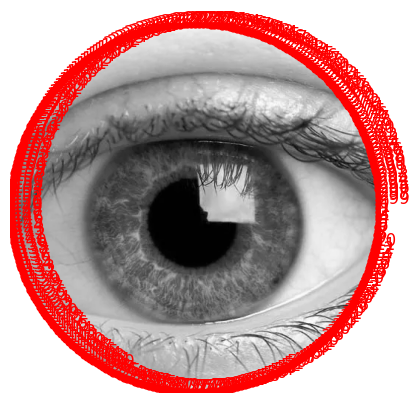

[(499.0, 250.0), (498.94539018523653, 255.2146625509559), (498.78158469461573, 260.4270377785707), (498.5086553786396, 265.634839362799), (498.12672195312655, 270.8357829897466), (497.63595194670006, 276.0275873536457), (497.036560627305, 281.2079751575118), (496.3288109077841, 286.3746741120405), (495.51301323055577, 291.52541793230944), (494.58952543144346, 296.65794733184543), (493.5587525827176, 301.7700110136221), (492.42114681541693, 306.85936665755327), (491.17720712102914, 311.92378190404884), (489.8274791326169, 316.96103533320115), (488.37255488548476, 321.9689174391734), (486.81307255749323, 326.94523159936193), (485.1497161891328, 331.8877950379072), (483.383215383481, 336.79443978313196), (481.5143449861746, 341.6630136184848), (479.54392474553663, 346.49138102657366), (477.4728189530076, 351.27742412587423), (475.30193606403884, 356.0190435997031), (473.03222829961385, 360.7141596170469), (470.66469122857245, 365.36071274484556), (468.2003633309221, 369.9566648513271), (4

In [33]:
def place_nails(image_path, num_nails):
    # Load the image
    image = Image.open(image_path)
    image = np.array(image)
    
    # Create the figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(image, cmap='gray')  # set colormap to gray

    # Calculate the coordinates of the nails
    center_x = image.shape[1] / 2
    center_y = image.shape[0] / 2
    radius = min(center_x, center_y) - 1
    
    # Store the nail coordinates
    nails = []
    
    for i in range(num_nails):
        angle = 2 * np.pi * i / num_nails
        x = center_x + radius * np.cos(angle)
        y = center_y + radius * np.sin(angle)
        
        # Store the nail coordinate
        nails.append((x, y))
        
        # Draw the nail number
        ax.text(x, y, str(i), color='red', fontsize=12)
        
        # Draw the nail position
        ax.plot(x, y, marker='o', markersize=5, color='red')
    
    plt.axis('off')  # hide the axes
    plt.show()
    
    # Return the nail coordinates
    return nails


nails = place_nails('cropped_and_masked_gray.png', num_nails)  # 30 nails for example

print(nails)

In [34]:
def generate_all_lines(nails):
    # Initialize a dictionary to store the lines
    lines = {}

    for i, nail1 in enumerate(nails):
        # Initialize a list to store the lines for this nail
        lines[i] = []

        for j, nail2 in enumerate(nails):
            # Don't generate a line from a nail to itself
            if i != j:
                x1, y1 = nail1
                x2, y2 = nail2

                # Generate the line and store it in the dictionary
                # line = bresenham_line(int(x1), int(y1), int(x2), int(y2))
                line = generate_line(int(x1), int(y1), int(x2), int(y2))
                lines[i].append((j, line))
                
    return lines

lines = generate_all_lines(nails)


In [35]:
image = Image.open('cropped_and_masked_gray.png')
image = np.array(image)

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def draw_lines_from_nail(nail_number, lines, image_path):
    # Create the figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Get the lines for the specified nail
    nail_lines = lines[nail_number]

    for nail, line in nail_lines:
        # Extract the x and y coordinates of the line
        xs, ys = zip(*[point for point in line])

        # Draw the line
        ax.plot(xs, ys, color='red')

    plt.axis('off')  # hide the axes
    plt.show()

In [37]:
def find_darkest_target(image, nail1):
    buff = 20
    # Initialize the darkest nail as the first one and the maximum darkness as 0
    darkest_target_nail, max_darkness = None, 0

    for target_nail, line in lines[nail1]:
        if abs(nail1 - target_nail) < buff:
            continue
        # Sum the darkness values for this line
        total_darkness = sum(255 - image[y, x] for (x, y) in line)/ len(line)
        # If the total darkness for this nail is greater than the current maximum
        if total_darkness > max_darkness:
            # Update the darkest nail and maximum darkness
            darkest_target_nail, max_darkness = target_nail, total_darkness

    return darkest_target_nail

# Let's test the function with nail number 1 for example
darkest_target = find_darkest_target(image, 1)
print(f"The darkest target from nail 1 is nail {darkest_target}.")

The darkest target from nail 1 is nail 291.


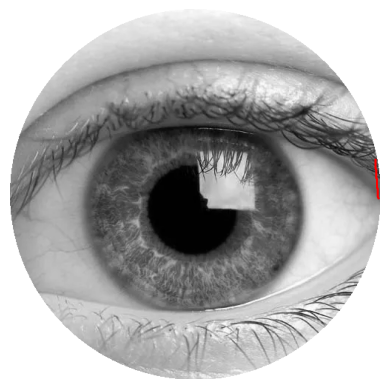

In [38]:
def draw_darkest_line(image_path, lines, nail, target):
    # Create the figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Find the line between the nail and the target
    for target_nail, line in lines[nail]:
        if target_nail == target:
            # If this is the line to the target, draw it
            xs, ys = zip(*[point for point in line])
            ax.plot(xs, ys, 'r')
            break

    plt.axis('off')
    plt.show()

# Find the darkest target from nail 1
darkest_target = find_darkest_target(image, 1)

# Draw the line from nail 1 to its darkest target
draw_darkest_line('cropped_and_masked_gray.png', lines, 1, darkest_target)


255


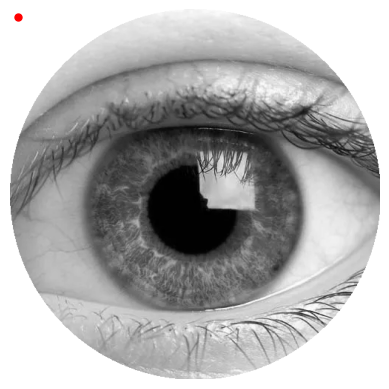

In [39]:

x,y = 10,10
print(image[x,y])
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')

ax.plot(x, y, marker='o', markersize=5, color='red')
plt.axis('off')  # hide the axes
plt.show()

In [40]:
print(lines[0][0])

(1, [(499, 250), (498, 251), (498, 252), (498, 253), (498, 255)])


In [41]:
def lighten_pixels_on_line(image, line, value):
    for (x, y) in line:
        # Ensure the value doesn't go below 0 or above 255
        new_value = min(255, max(0, image[y, x] + value))
        
        # Update the pixel value in the original image
        image[y, x] = new_value


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000


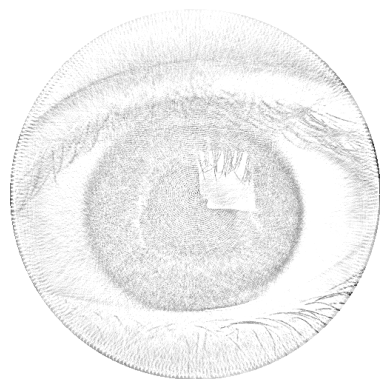

In [42]:

def makePic(start, image):
    count = 0 
    line_path = []
    prev = start
    for i in range(max_lines):
        # calculate best line for each
        # def find_darkest_target(image, lines_from_nail):
        dl = find_darkest_target(image, prev)
        line_a = lines[prev]
        if dl+1 < len(line_a) and line_a[dl+1][0] == dl:
            line_b = line_a[dl+1]
            # print(line_b[0],  end, "+1")
        elif dl-1 > 0 and line_a[dl-1][0] == dl:
            line_b = line_a[dl-1]
            # print(line_b[0],  end, "-1")
        else:
            line_b = line_a[dl]
            # print(line_b[0], end,"0")
        if line_b[0] != dl:
            print("mismatch", line_b[0], dl)
        # print(line_b[0] == dl)
        line_c = line_b[1]
        line_path.append((prev, line_b[0]))
        lighten_pixels_on_line(image,line_c, darkness)
        prev = dl
        count+=1
        if not count % 200:
            print(count + " / " + max_lines)
    return line_path

line_path = makePic(0,image)
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

plt.axis('off')  # hide the axes
plt.show()
    

In [43]:
def darken_pixels_on_line(image, line, value):
    for (x, y) in line:
        # Ensure the value doesn't go below 0 or above 255
        new_value = max(0, min(255, image[y, x] - value))
        
        # Update the pixel value in the original image
        image[y, x] = new_value

0


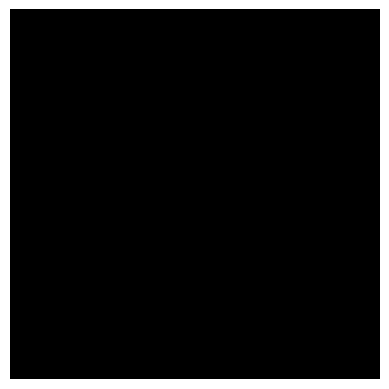

In [44]:
canvas = np.full_like(image, fill_value=0)
fig, ax = plt.subplots()
ax.imshow(canvas, cmap='gray')
x,y = 150,150
print(canvas[x,y])
plt.axis('off')  # hide the axes
plt.show()
    

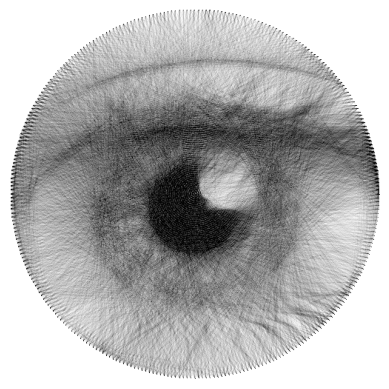

In [45]:
def trace_lines(image, line_path):
    # Create a blank canvas of the same size as the image
    canvas = np.full_like(image, fill_value=255)
    for start, end in line_path:
        line_a = lines[start]
        # print(line_a[end][0], end)
        if end+1 < len(line_a) and line_a[end+1][0] == end:
            line_b = line_a[end+1]
            # print(line_b[0],  end, "+1")
        elif end-1 > 0 and line_a[end-1][0] == end:
            line_b = line_a[end-1]
            # print(line_b[0],  end, "-1")
        else:
            line_b = line_a[end]
            # print(line_b[0], end,"0")
        # print(line_b[0] == end)
        # print(line_b[0],  end-1)
        line_c = line_b[1]
        darken_pixels_on_line(canvas,line_c, darkness)
    return canvas
canvas = trace_lines(image, line_path)
fig, ax = plt.subplots()
ax.imshow(canvas, cmap='gray')

plt.axis('off')  # hide the axes
plt.show()
    

In [46]:
def getpoints():
    res = []
    for i,j in line_path:
        res.append(i)
    return res

x = getpoints()
print(x)

[0, 292, 176, 291, 174, 289, 170, 287, 169, 285, 166, 284, 164, 285, 168, 287, 164, 283, 163, 285, 167, 284, 165, 285, 162, 283, 165, 289, 166, 283, 159, 284, 163, 288, 164, 286, 168, 283, 158, 284, 168, 289, 172, 286, 166, 287, 165, 288, 170, 286, 169, 289, 164, 282, 165, 290, 171, 288, 162, 286, 167, 287, 163, 282, 160, 284, 169, 288, 161, 283, 167, 289, 173, 291, 175, 40, 174, 290, 164, 281, 162, 284, 161, 285, 159, 286, 160, 285, 171, 287, 159, 276, 157, 283, 164, 22, 165, 24, 168, 28, 166, 288, 1, 291, 0, 294, 178, 44, 183, 50, 182, 44, 184, 38, 187, 40, 173, 28, 167, 285, 157, 274, 156, 283, 160, 275, 159, 16, 160, 277, 162, 282, 167, 29, 171, 289, 176, 33, 169, 283, 154, 18, 158, 285, 172, 28, 175, 290, 166, 26, 168, 288, 172, 40, 176, 38, 188, 41, 189, 46, 191, 47, 192, 51, 194, 46, 180, 39, 179, 44, 176, 290, 178, 33, 168, 285, 156, 286, 165, 280, 160, 22, 167, 25, 164, 279, 161, 286, 2, 141, 283, 155, 20, 162, 289, 153, 283, 143, 4, 144, 284, 170, 290, 167, 30, 170, 27, 164, 

[0, [219, 237]]


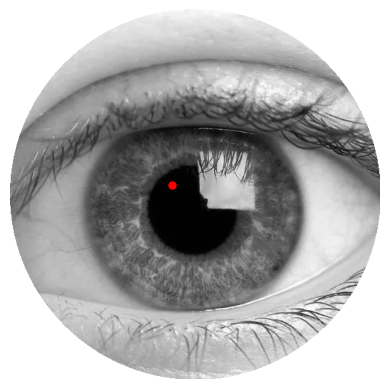

In [47]:
image = Image.open('cropped_and_masked_gray.png')
image = np.array(image)
m = [255, [0,0]]
for i in range(size):
    for j in range(size):
        if image[i,j] < m[0]:
            m[0] = image[i,j]
            m[1] = [i,j]
print(m)
        
x,y = m[1]
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
ax.plot(x, y, marker='o', markersize=5, color='red')
plt.axis('off')  # hide the axes
plt.show()